In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import geopandas as gpd
from matplotlib.colors import TwoSlopeNorm  # Use CenteredNorm for newer matplotlib versions
from matplotlib.cm import ScalarMappable
import matplotlib.colors
import numpy as np
from scipy.stats import wilcoxon


import matplotlib as mpl


mpl.rcParams.update({
    'font.family':          'sans-serif',
    'font.sans-serif':      ['Arial'],
    'mathtext.fontset':     'custom',
    'mathtext.rm':          'Arial',
    'mathtext.it':          'Arial:italic',
    'mathtext.bf':          'Arial:bold',
    'mathtext.cal':         'Arial',        # for calligraphic if you like
})

In [2]:
matplotlib.rc('font', family='Arial') 

In [2]:
pop_df=pd.read_csv(r'C:\Users\Yasaman\Downloads\World_bank_population.csv',skiprows=3)
pop_df=pop_df[['Country Code','2019']].dropna()
pop_df['2019']=pop_df['2019'].astype(int)
possible_countries=pop_df.query(" `2019` >=1000000")['Country Code'].values
possible_countries=[x.lower() for x in possible_countries]

In [3]:
excluded_iso3_codes = [
    "IRL",  # Ireland
    "SSD",  # South Sudan
    "SDN",  # Sudan
    "COG",  # Republic of the Congo
    "COD",  # Democratic Republic of the Congo
    "GIN",  # Guinea
    "GNB",  # Guinea-Bissau
    "GNQ",  # Equatorial Guinea
    "PNG",  # Papua New Guinea
    "XKX",  # Kosovo (unofficial)
    "MNE",  # Montenegro
    "SRB",  # Serbia
    "TLS",   # Timor-Leste
    "GEO" #Georgia

]
excluded_iso3_codes=[c.lower() for c in excluded_iso3_codes]

In [4]:
possible_iso=list(set(possible_countries)-set(excluded_iso3_codes))

In [5]:
df = pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")
df=df[df['country'].isin(possible_iso)]
df.rename(columns={'aggregated_value': 'count', 'country': 'Mention_country', 'affiliation_country': 'Aff_country'}, inplace=True)
df = df[df['year'].isin(range(2002, 2020))]

In [6]:
Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country.lower() for country in Country_list.values()]
physical_sciences=['MATH', 'ENGI', 'PHYS', 'COMP', 'MUL']
df=df[~df['subjarea'].isin(physical_sciences)]
df['year_arabspring']=df['year'].apply(lambda x: 'before' if x>=2002 and x<=2010 else 'after' )


In [7]:
df=df[df['Mention_country'].isin(abbr)].groupby(['Mention_country','year_arabspring', 'Aff_country' ])['count'].sum().reset_index()

In [8]:
df_pivoted = df.pivot(index=['Mention_country', 'Aff_country'], columns='year_arabspring', values='count').reset_index().fillna(0)



In [9]:
df_pivoted=df_pivoted[df_pivoted['Mention_country']!=df_pivoted['Aff_country']]

In [10]:
df_pivoted['Change']=df_pivoted['after']-df_pivoted['before']
df_pivoted['Change']/=9
to_study=df_pivoted.groupby('Aff_country')['Change'].sum().sort_values(ascending=False)[:10].index.tolist()
to_study

['usa', 'gbr', 'sau', 'fra', 'esp', 'deu', 'ita', 'mys', 'irn', 'aus']

In [11]:
df = pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")
df=df[df['country'].isin(possible_iso)]
df.rename(columns={'aggregated_value': 'count', 'country': 'Mention_country', 'affiliation_country': 'Aff_country'}, inplace=True)
df = df[df['year'].isin(range(2002, 2020))]
Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country.lower() for country in Country_list.values()]
physical_sciences=['MATH', 'ENGI', 'PHYS', 'COMP', 'MUL']
df=df[~df['subjarea'].isin(physical_sciences)]
df['year_arabspring']=df['year'].apply(lambda x: 'before' if x>=2002 and x<=2010 else 'after' )



In [12]:
colors=[
    "#E69F00",  # Orange
    "#56B4E9",  # Sky Blue
    "#009E73",  # Bluish Green
    "#6929C4",  # Purple 70
    "#CC79A7",  # Reddish Purple

    "#0072B2",  # Blue
    "#D55E00",  # Vermillion
    # Three additional color‑blind‑friendly hues from Paul Tol’s “Muted” scheme:
    "#999933",  # Teal
    "#8A3800",  # Magenta 50
    "#882255",  # Wine (added)
]

country_colors_manual = {
        'EGY': colors[0],  # Egypt
        'TUN': colors[1],  # Tunisia
        'LBY': colors[2],  # Libya 
        'SYR': colors[3],  # Syria
        'YEM': colors[4],  # Yemen
        'BHR': colors[5],  # Bahrain
        'JOR': colors[6],  # Jordan
        'KWT': colors[7],  # Kuwait
        'MAR': colors[8],  # Morocco
        'OMN': colors[9],  # Oman
    }

In [13]:
    # Define full country names
    country_full_names = {
        'EGY': 'Egypt',
        'LBY': 'Libya',
        'TUN': 'Tunisia',
        'SYR': 'Syria',
        'YEM': 'Yemen',
        'MAR': 'Morocco',
        'OMN': 'Oman',
        'BHR': 'Bahrain',
        'KWT': 'Kuwait',
        'JOR': 'Jordan',
    }

to_study_map={'usa':'USA', 'gbr':'UK', 'sau':'Saudi Arabia', 'fra':'France', 'esp':'Spain', 'deu':'Germany', 'ita':'Italy', 'mys':'Malaysia', 'irn':'Iran', 'aus':'Australia'}

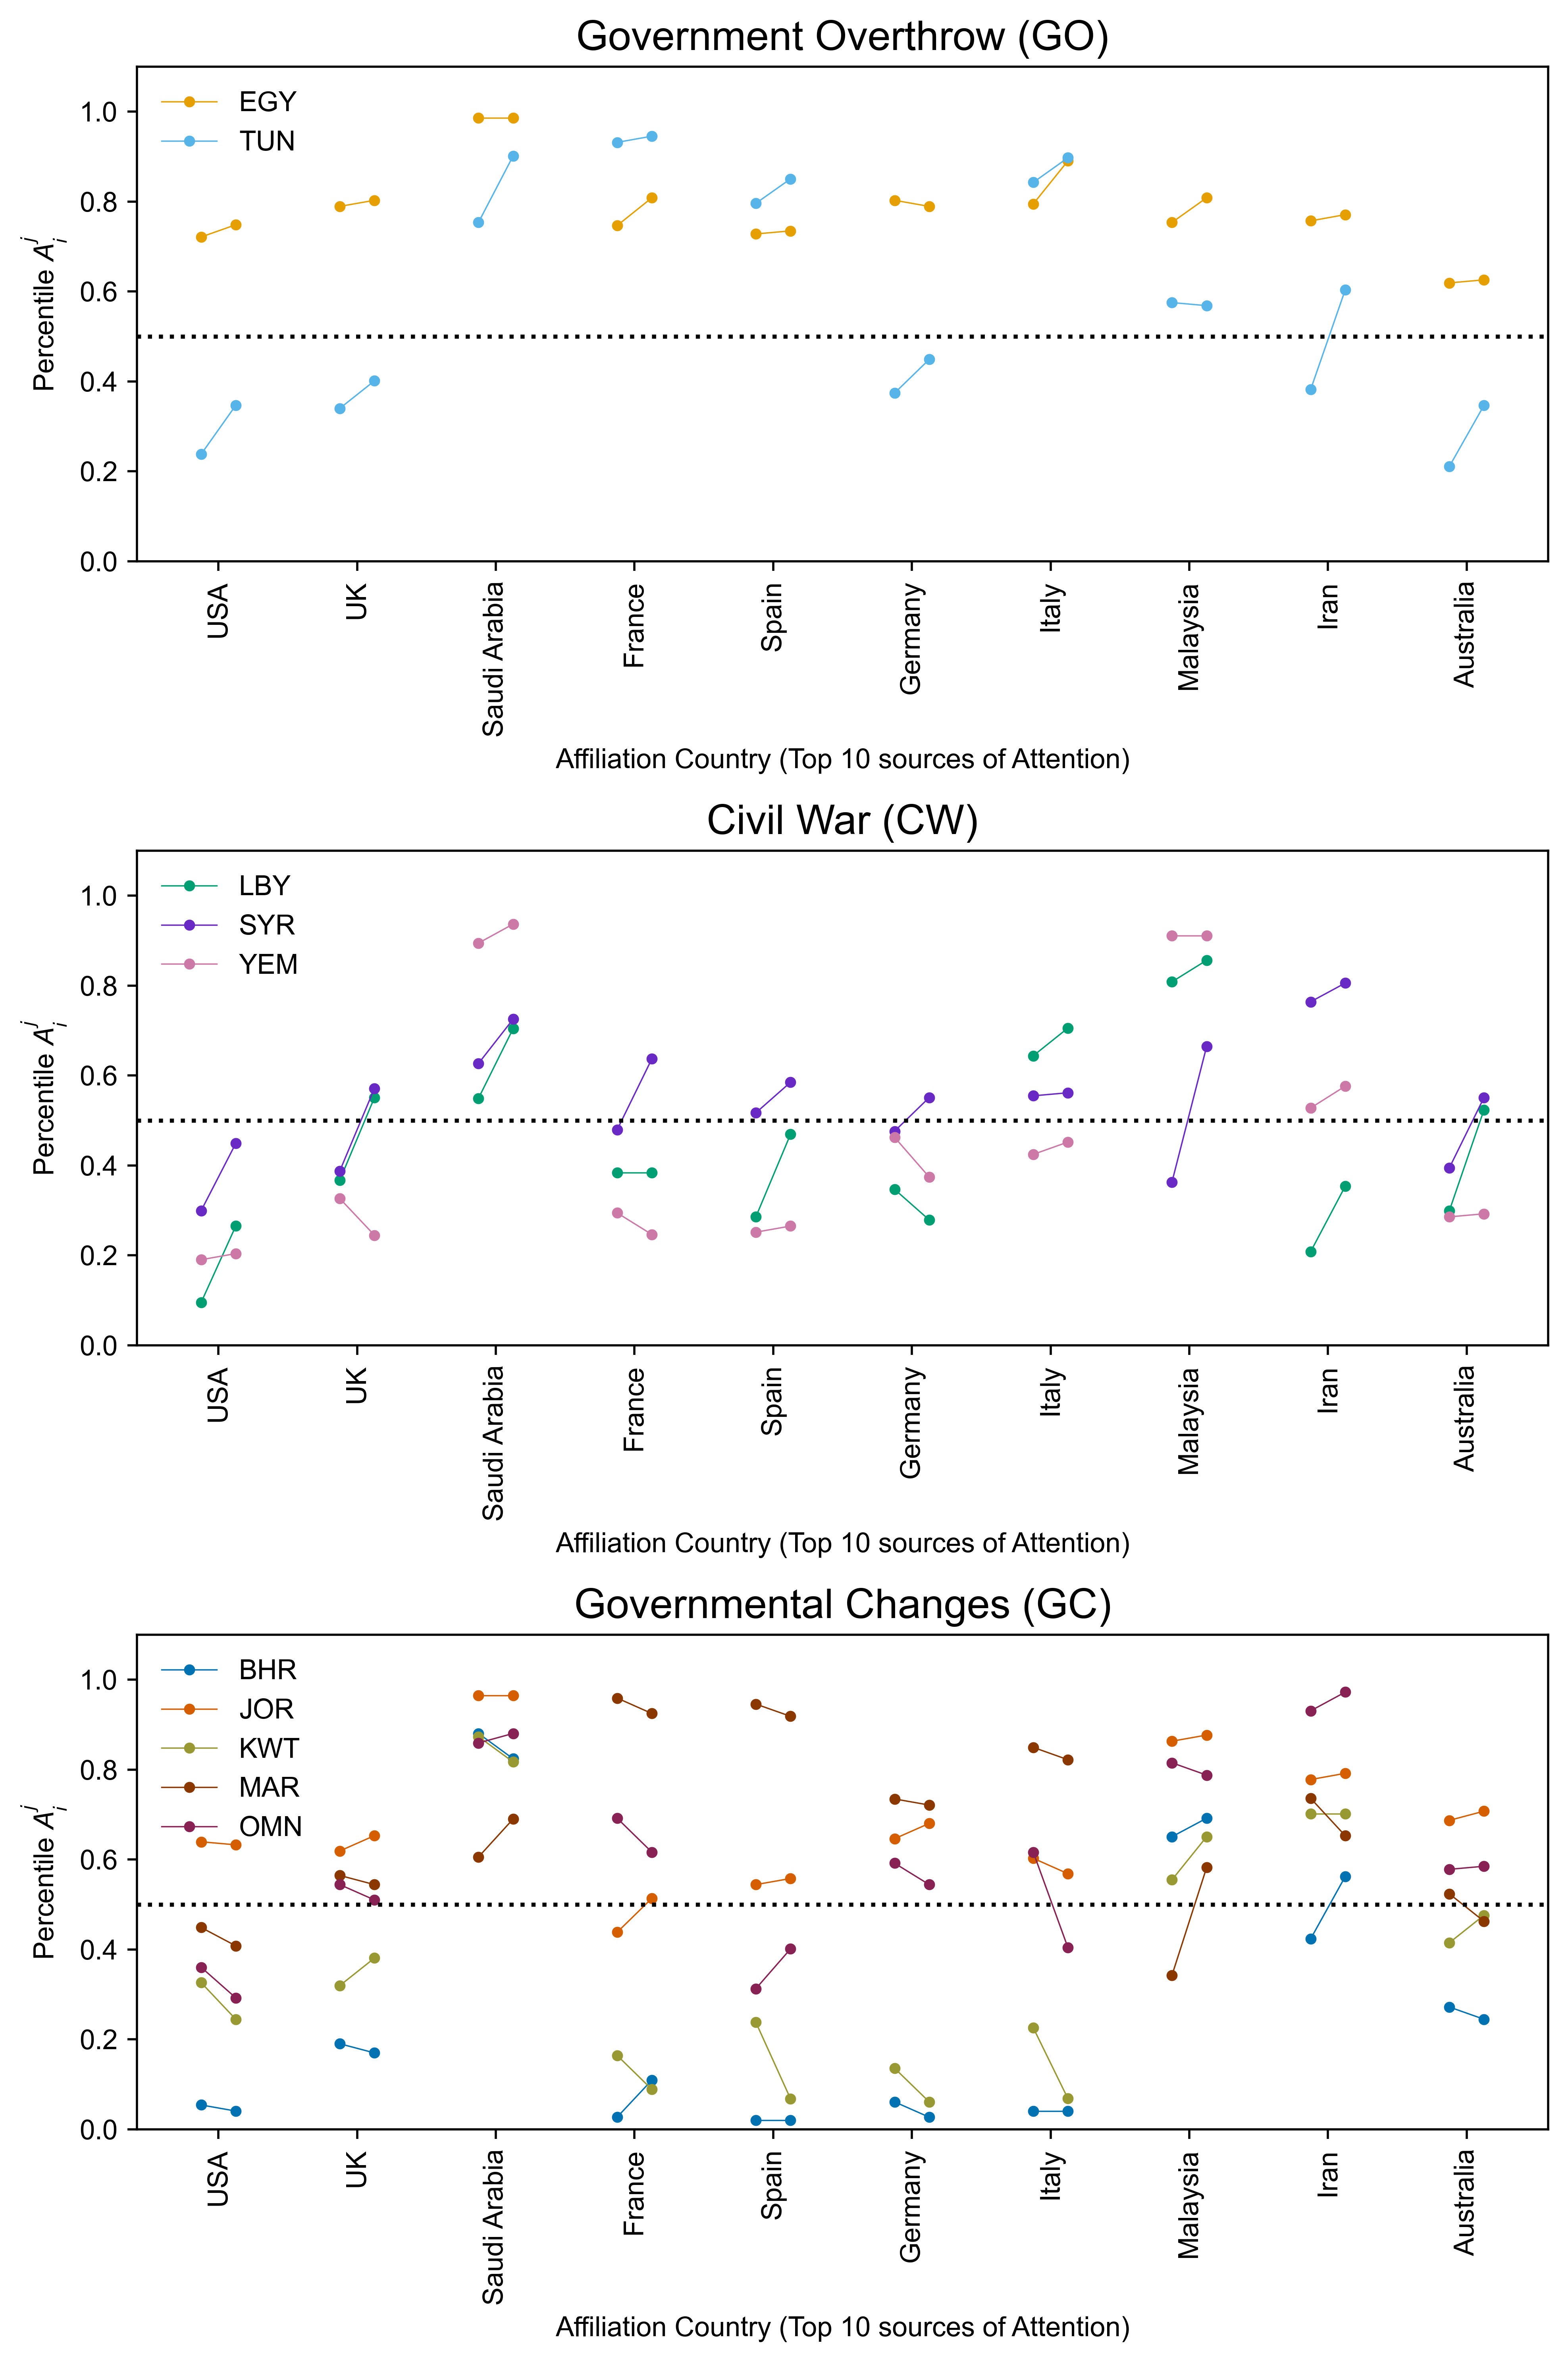

In [17]:
fig, ax=plt.subplots(nrows=3, ncols=1, dpi=500, figsize=(8, 12))
for j, country in enumerate(to_study):
    country_df=df[df['Aff_country']==country].groupby(['Mention_country', 'year_arabspring'])['count'].sum().reset_index()#.drop(columns=['year', 'Aff_country','subjarea'])
    df_pivoted = country_df.pivot(index=['Mention_country'], columns='year_arabspring', values='count').reset_index().fillna(0)
    df_pivoted['before_rank']=df_pivoted['before'].rank(pct=True)
    df_pivoted['after_rank']=df_pivoted['after'].rank(pct=True)
    final_df=df_pivoted[df_pivoted['Mention_country'].isin(abbr)].reset_index(drop=True)
    for i, row in final_df.iterrows():
        if row['Mention_country'] in (['tun', 'egy',]):
            axis=ax[0]
        elif row['Mention_country'] in (['syr','lby', 'yem']):
            axis=ax[1]
        else:
            axis=ax[2]

        if j==0:
            axis.plot([2*j+0, 2*j+0.5], [row['before_rank'], row['after_rank']], marker='.', color=country_colors_manual[row['Mention_country'].upper()], label=row['Mention_country'].upper(), linewidth=0.5)
        else:
            axis.plot([2*j+0, 2*j+0.5], [row['before_rank'], row['after_rank']], marker='.', color=country_colors_manual[row['Mention_country'].upper()], linewidth=0.5)

for i in range(3):
    ax[i].set_ylim(0, 1.1)
    
    ax[i].set_xticks(np.arange(0, 2*len(to_study),2)+0.25, to_study_map.values(), rotation=90)
    
    ax[i].set_xlabel('Affiliation Country (Top 10 sources of Attention)')
    ax[i].set_ylabel('Percentile ' +r'$A_i^j$')
    ax[i].axhline(0.5, linestyle=':', color='k')
    ax[i].legend(frameon=False, loc='upper left')

ax[0].set_title('Government Overthrow (GO)', fontsize=15)
ax[1].set_title('Civil War (CW)', fontsize=15)
ax[2].set_title('Governmental Changes (GC)', fontsize=15)

#fig.legend(frameon=False, bbox_to_anchor=(0.90, 1),
 #           ncol=10)

fig.tight_layout()
fig.savefig('rankchanges.pdf')

In [37]:
from scipy.stats import wilcoxon

for j, country in enumerate(to_study):
    country_df = df[df['Aff_country'] == country].groupby(['Mention_country', 'year_arabspring'])['count'].sum().reset_index()
    df_pivoted = country_df.pivot(index=['Mention_country'], columns='year_arabspring', values='count').reset_index().fillna(0)
    df_pivoted['before_rank'] = df_pivoted['before'].rank(pct=True)
    df_pivoted['after_rank'] = df_pivoted['after'].rank(pct=True)

    final_df = df_pivoted[df_pivoted['Mention_country'].isin(abbr)].reset_index(drop=True)
    final_df = final_df.sort_values('Mention_country')

    before = final_df['before_rank']
    after = final_df['after_rank']

    # Perform one-sided Wilcoxon test (H1: after > before)
    try:
        statistic, p_value = wilcoxon(before, after, alternative='greater')
        print(country, "Wilcoxon Signed-Rank Test (after > before):")
        print("Statistic:", statistic, "p-value:", p_value)
    except ValueError as e:
        print(country, "Wilcoxon test failed:", str(e))
    print()


usa Wilcoxon Signed-Rank Test (after > before):
Statistic: 21.0 p-value: 0.75390625

gbr Wilcoxon Signed-Rank Test (after > before):
Statistic: 18.0 p-value: 0.8388671875

sau Wilcoxon Signed-Rank Test (after > before):
Statistic: 7.0 p-value: 0.9382573639277255

fra Wilcoxon Signed-Rank Test (after > before):
Statistic: 16.0 p-value: 0.7793659333355352

esp Wilcoxon Signed-Rank Test (after > before):
Statistic: 12.0 p-value: 0.8932378229819088

deu Wilcoxon Signed-Rank Test (after > before):
Statistic: 37.0 p-value: 0.1875

ita Wilcoxon Signed-Rank Test (after > before):
Statistic: 23.5 p-value: 0.4528064985176012

mys Wilcoxon Signed-Rank Test (after > before):
Statistic: 4.0 p-value: 0.9857990814778992

irn Wilcoxon Signed-Rank Test (after > before):
Statistic: 6.0 p-value: 0.9746937838804076

aus Wilcoxon Signed-Rank Test (after > before):
Statistic: 12.0 p-value: 0.947265625



In [42]:
from scipy.stats import binomtest

for j, country in enumerate(to_study):
    country_df = df[df['Aff_country'] == country].groupby(['Mention_country', 'year_arabspring'])['count'].sum().reset_index()
    df_pivoted = country_df.pivot(index=['Mention_country'], columns='year_arabspring', values='count').reset_index().fillna(0)
    df_pivoted['before_rank'] = df_pivoted['before'].rank(pct=True)
    df_pivoted['after_rank'] = df_pivoted['after'].rank(pct=True)

    final_df = df_pivoted[df_pivoted['Mention_country'].isin(abbr)].reset_index(drop=True)
    final_df = final_df[final_df['Mention_country'].isin(['tun', 'egy','syr','lby', 'yem'])].sort_values('Mention_country')

    before = final_df['before_rank']
    after = final_df['after_rank']

    # Calculate differences
    diff = after - before
    n_positive = (diff > 0).sum()  # how many improved (after > before)
    n_negative = (diff < 0).sum()  # how many declined
    n_trials = n_positive + n_negative  # exclude ties

    if n_trials > 0:
        # Perform one-sided sign test: H0 = no change, H1 = increase (after > before)
        result = binomtest(n_positive, n=n_trials, p=0.5, alternative='greater')
        print(country, "Sign Test (after > before): Positive =", n_positive, "Negative =", n_negative)
        print("Sign test one-sided p-value:", result.pvalue)
    else:
        print(country, "Sign Test: No differences (all ties)")
    print()



usa Sign Test (after > before): Positive = 5 Negative = 0
Sign test one-sided p-value: 0.03125

gbr Sign Test (after > before): Positive = 4 Negative = 1
Sign test one-sided p-value: 0.1875

sau Sign Test (after > before): Positive = 4 Negative = 0
Sign test one-sided p-value: 0.0625

fra Sign Test (after > before): Positive = 3 Negative = 1
Sign test one-sided p-value: 0.3125

esp Sign Test (after > before): Positive = 5 Negative = 0
Sign test one-sided p-value: 0.03125

deu Sign Test (after > before): Positive = 2 Negative = 3
Sign test one-sided p-value: 0.8125

ita Sign Test (after > before): Positive = 5 Negative = 0
Sign test one-sided p-value: 0.03125

mys Sign Test (after > before): Positive = 3 Negative = 1
Sign test one-sided p-value: 0.3125

irn Sign Test (after > before): Positive = 5 Negative = 0
Sign test one-sided p-value: 0.03125

aus Sign Test (after > before): Positive = 5 Negative = 0
Sign test one-sided p-value: 0.03125

